In [25]:
import requests
from time import sleep
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from dateutil.parser import parse
import pandas as pd
from datetime import datetime, timezone

In [26]:
URL = "https://www.worldometers.info/coronavirus"

In [27]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36"}
page = requests.get(URL, headers=headers)  #, verify=False)
soup = BeautifulSoup(page.content, 'html.parser')

In [28]:
cases = int(soup.find_all("div",{"class":"maincounter-number"})[0].span.get_text().strip().replace(",",""))
deaths = int(soup.find_all("div",{"class":"maincounter-number"})[1].span.get_text().strip().replace(",",""))
recoveries = int(soup.find_all("div",{"class":"maincounter-number"})[2].span.get_text().strip().replace(",",""))
mild_condition = int(soup.find_all("span",{"class":"number-table"})[0].get_text().strip().replace(",",""))

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"><!--<![endif]--><head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Coronavirus Update (Live): 182,725 Cases and 7,174 Deaths from COVID-19 Virus Outbreak - Worldometer</title> <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, and death toll by country due to the COVID 19 coronavirus from Wuhan, China. Coronavirus counter with new cases, historical data, and info. Daily charts, graphs, news and updates" name="description"/> <!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon"
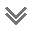
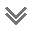

In [29]:
soup

In [30]:
closed_cases = recoveries + deaths

In [31]:
active_cases = cases - recoveries - deaths

In [32]:
critical = active_cases - mild_condition

In [33]:
last_updated = soup.find("div", {"style":"font-size:13px; color:#999; text-align:center"}).get_text().strip("Last updated: ")
last_updated = parse(last_updated, fuzzy=True)
last_updated = last_updated.replace(tzinfo=timezone.utc).astimezone(tz=None)

In [34]:
header = soup.find_all("th")
table = soup.find_all("td")

In [35]:
headers = []
for i in range(len(header)):
    headers.append(header[i].get_text().strip())

In [36]:
corona_data = pd.DataFrame(columns=headers)

In [37]:
rows = int(len(table)/len(header))
cols = int(len(table))

In [38]:
values = []
for i in range(cols):
    values.append(table[i].get_text().strip())

In [39]:
for i in range(rows):
    corona_data.loc[len(corona_data)] = values[i*9:(i+1)*9]

In [40]:
corona_data.set_index(headers[0], inplace=True)

In [41]:
corona_data = corona_data.replace('[\+]', '', regex=True)
corona_data = corona_data.replace(',', '', regex=True)
corona_data = corona_data.drop(['Total:'])

In [42]:
corona_data.apply(pd.to_numeric)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
"Country,Other",,,,,,,,
China,80881,21.0,3226.0,13.0,68690.0,8965,3226.0,56.2
Italy,27980,NaN,2158.0,NaN,2749.0,23073,1851.0,NaN
Iran,14991,NaN,853.0,NaN,4996.0,9142,NaN,178.5
Spain,9942,NaN,342.0,NaN,530.0,9070,272.0,212.6
S. Korea,8320,84.0,81.0,6.0,1401.0,6838,59.0,162.3
...,...,...,...,...,...,...,...,...
Suriname,1,NaN,NaN,NaN,NaN,1,NaN,NaN
Eswatini,1,NaN,NaN,NaN,NaN,1,NaN,0.9
Tanzania,1,NaN,NaN,NaN,NaN,1,NaN,NaN


In [43]:
corona_excel = corona_data.to_excel(r"C:\Users\dsaraph\OneDrive - Capgemini\data-science\data.xlsx", sheet_name='Data')

In [44]:
import openpyxl
wb = openpyxl.load_workbook(r'C:\Users\dsaraph\OneDrive - Capgemini\data-science\data.xlsx')

In [45]:
wb1 = wb.create_sheet("Last Updated")

In [46]:
wb1['A1'] ="Last Updated"

In [47]:
wb1['A2'] = last_updated

In [48]:
wb.save(r'C:\Users\dsaraph\OneDrive - Capgemini\data-science\data.xlsx')